Bengaluru Home Price Prediction Model 

Data Cleaning

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [74]:
df=df.drop(['area_type','availability','society','balcony'],axis='columns')

In [75]:
print(df.isnull().sum())
df

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [76]:
df=df.dropna()
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [77]:
df['size']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df

C:\Users\HP USER\AppData\Local\Temp\ipykernel_508\723193449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [78]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [79]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2,850 - 1060,2.0,38.190
12990,Talaghattapura,3,1804 - 2273,3.0,122.000
13059,Harlur,2,1200 - 1470,2.0,72.760
13265,Hoodi,2,1133 - 1384,2.0,59.135


In [80]:
def convert_into_number(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [81]:
df['total_sqft']=df['total_sqft'].apply(convert_into_number)
df['total_sqft']=df['total_sqft'].dropna()
df['price(lakh)']=df['price']
df=df.drop(['price'],axis='columns')
df

C:\Users\HP USER\AppData\Local\Temp\ipykernel_508\3892774665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].apply(convert_into_number)
C:\Users\HP USER\AppData\Local\Temp\ipykernel_508\3892774665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].dropna()
C:\Users\HP USER\AppData\Local\Temp\ipykernel_508\3892774665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,location,size,total_sqft,bath,price(lakh)
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [82]:
df.loc[188]

location       KR Puram
size                  2
total_sqft       1277.5
bath                2.0
price(lakh)        56.8
Name: 188, dtype: object

In [83]:
df['price_per_sqft']=(df['price(lakh)']*100000)/df['total_sqft']
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,Richards Town,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [84]:
df['location']=df['location'].apply(lambda x: x.strip())
location_stat= df['location'].value_counts()
location_stat

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

If location count is less than 10 then it will be shown ans others

In [85]:
df['location']=df['location'].apply(lambda x: x if location_stat[x]>10 else 'others')
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,others,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


Outlier Detection and removal using sqft_per_room stat 

In [86]:
df['sqft_per_room']=df['total_sqft']/df['size']
df['z_score']=(df['sqft_per_room']-df['sqft_per_room'].mean())/df['sqft_per_room'].std()
df=df[(df['z_score']<=3) & (df['z_score']>=-3)]
df=df.drop(['z_score','sqft_per_room'],axis='columns')
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,others,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


Outlier removal using price_per_sqft in every location

In [87]:
df['price_per_sqft'].describe()

count    1.314000e+04
mean     7.909938e+03
std      1.069688e+05
min      5.000000e+02
25%      4.268165e+03
50%      5.428571e+03
75%      7.299849e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-(3*st))) & (subdf.price_per_sqft<=(m+(3*st)))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df=remove_pps_outliers(df)
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.00,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
4,1st Block Jayanagar,4,2400.0,4.0,450.00,18750.000000
...,...,...,...,...,...,...
12965,others,1,812.0,1.0,26.00,3201.970443
12966,others,3,1440.0,2.0,63.93,4439.583333
12967,others,2,1075.0,2.0,48.00,4465.116279
12968,others,4,1200.0,5.0,325.00,27083.333333


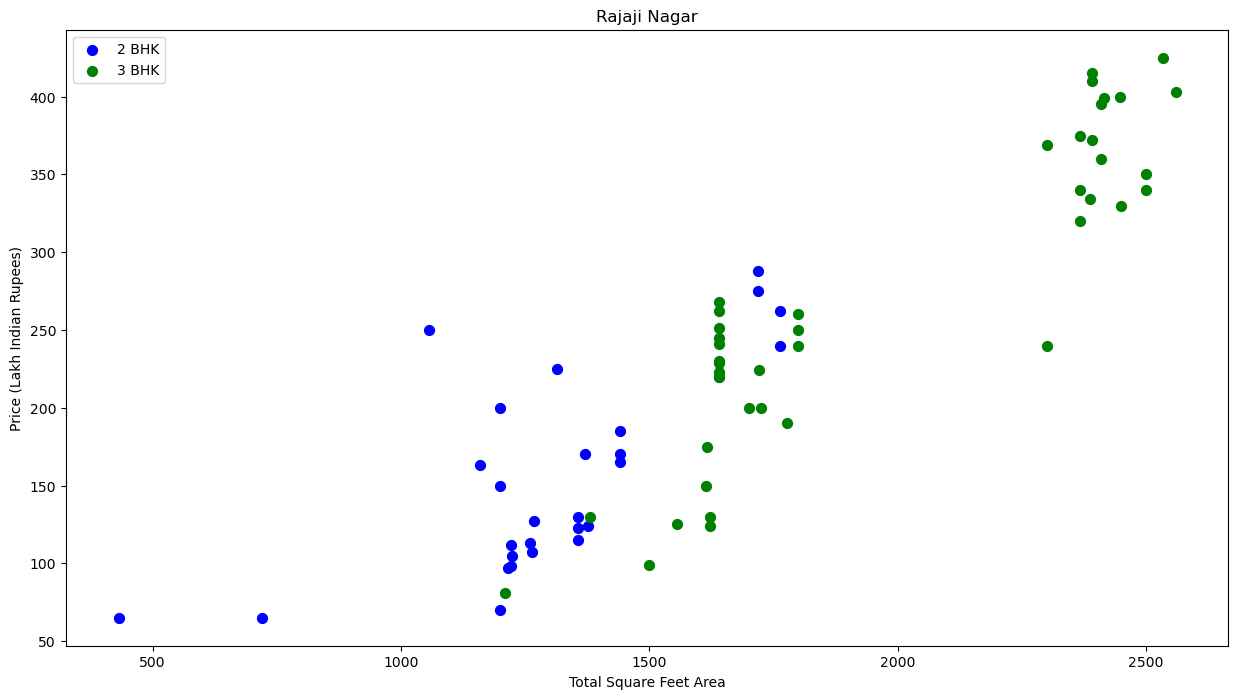

In [89]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location']==location) & (df['size']==2)]
    bhk3 = df[(df['location']==location) & (df['size']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    plt.scatter(bhk2['total_sqft'],bhk2['price(lakh)'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price(lakh)'],color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")
plt.show()

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [90]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,4,2400.0,4.0,450.0,18750.000000
...,...,...,...,...,...,...
12961,others,7,1400.0,7.0,218.0,15571.428571
12964,others,2,1353.0,2.0,110.0,8130.081301
12965,others,1,812.0,1.0,26.0,3201.970443
12968,others,4,1200.0,5.0,325.0,27083.333333


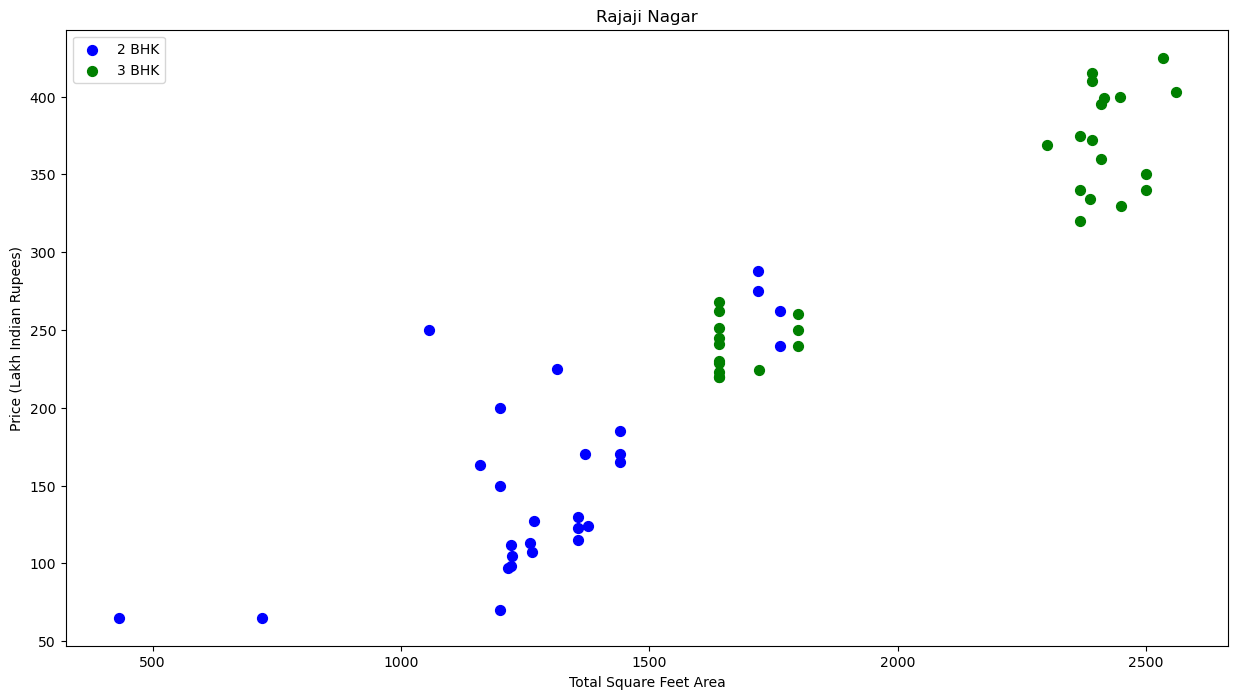

In [91]:
plot_scatter_chart(df,"Rajaji Nagar")
plt.show()

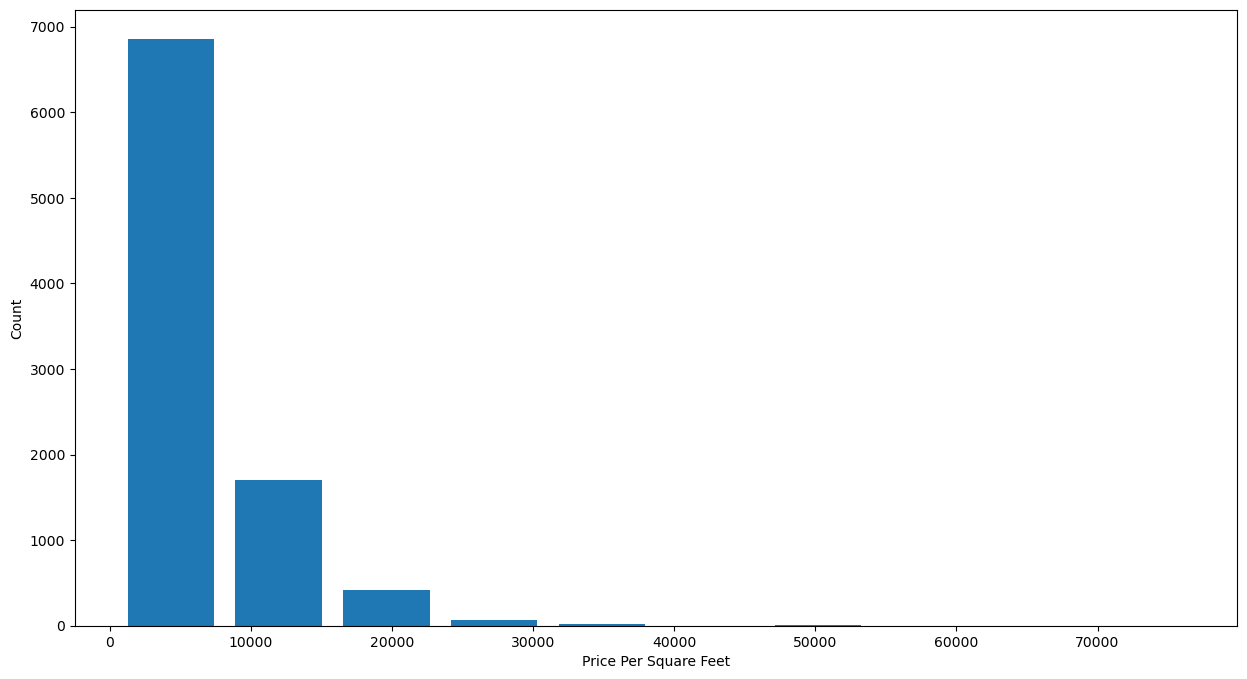

In [92]:
matplotlib.rcParams["figure.figsize"] = (15,8)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

Outlier removal using bathroom

According to some data it is found that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [93]:
df=df[df['bath']<=df['size']+2]
df

,location,size,total_sqft,bath,price(lakh),price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
4,1st Block Jayanagar,4,2400.0,4.0,450.0,18750.000000
...,...,...,...,...,...,...
12961,others,7,1400.0,7.0,218.0,15571.428571
12964,others,2,1353.0,2.0,110.0,8130.081301
12965,others,1,812.0,1.0,26.0,3201.970443
12968,others,4,1200.0,5.0,325.0,27083.333333


In [94]:
df=df.drop(['price_per_sqft'],axis='columns')
df

,location,size,total_sqft,bath,price(lakh)
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,6,1200.0,6.0,125.0
3,1st Block Jayanagar,3,1875.0,2.0,235.0
4,1st Block Jayanagar,4,2400.0,4.0,450.0
...,...,...,...,...,...
12961,others,7,1400.0,7.0,218.0
12964,others,2,1353.0,2.0,110.0
12965,others,1,812.0,1.0,26.0
12968,others,4,1200.0,5.0,325.0


Hot Encoding in location using dummy variables

In [95]:
dummies = pd.get_dummies(df.location)
df = pd.concat([df,dummies],axis='columns')
df = df.drop(['location','others'],axis='columns')
df.head(10)
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# le= LabelEncoder()

# df['location']=le.fit_transform(df['location'])
# df1=df.drop(['price(lakh)'],axis='columns')
# df2=df['price(lakh)']
# X=df1.values
# Y=df2.values

# ct= ColumnTransformer([('price(lakh)',OneHotEncoder(),[0])],remainder='passthrough')
# X=ct.fit_transform(X)
# X=X[:,1:]

,size,total_sqft,bath,price(lakh),1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,194.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6,1200.0,6.0,125.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1875.0,2.0,235.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2400.0,4.0,450.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2,1000.0,3.0,60.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,930.0,4.0,85.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,8,700.0,4.0,104.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3,1200.0,2.0,130.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2,1235.0,2.0,148.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now different Model application and hyperparameter tunning

In [96]:
X=df.drop(['price(lakh)'],axis='columns')
Y=df['price(lakh)']
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]  
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'ridge':{
      'model':Ridge(),
      'params': {
          'alpha':[1,2],
          'solver':['auto','svd','cholesky','sag','saga']
      }  
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['squared_error','friedman_mse'],  # Fixed issue: Replaced 'mse' (deprecated)
            'splitter': ['best','random']
        }
    }
}


    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: T

,model,best_score,best_params
0,linear_regression,0.716469,{'fit_intercept': False}
1,lasso,0.620649,"{'alpha': 1, 'selection': 'random'}"
2,ridge,0.714076,"{'alpha': 1, 'solver': 'svd'}"
3,decision_tree,0.527334,"{'criterion': 'squared_error', 'splitter': 'be..."


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [109]:
model.score(X_test,Y_test)

0.7541179234812303

Test the model for few properties

In [112]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [113]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.11620101087857

In [114]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


99.53739256906995

In [115]:
predict_price('Indira Nagar',1000, 2, 2)

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


170.21396423219272

In [116]:
predict_price('Indira Nagar',1000, 3, 3)

c:\Users\HP USER\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


174.63515579038415

Export the tested model to a pickle file

In [117]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

Export location and column information to a file that will be useful later on in our prediction application

In [118]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))